# CS344 Final Project - Peter Peng & Daniel Kwik
# Training a facial emotion classifier with fast.ai


## Goal
This project is to replicate a [Kaggle competition](https://www.kaggle.com/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/overview) to build a Facial Expression Recognition (FER) model to classify images of faces with emotions using Fast.AI's library. Following the guidelines of the competition, we will use the data provided to categorize each face based on 7 different types of emotions: Anger, Disgust, Fear, Happiness, Sadness, Surprise, and Neutral. We find it interesting because knowing people's emotions with an AI can open the door for a lot of practical opportunities, for example, an emotion tracker application. The goal of this project is to train a state-of-the-art FER model, and a successful project outcome will be attaining about 73.28% of accuracy of the testing set, as shown in this [paper](https://arxiv.org/ftp/arxiv/papers/2105/2105.03588.pdf), which is surpassing the single-network state-of-the-art performance during the competition.

## Dataset
We are using the [FER2013](https://www.kaggle.com/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/data) dataset. We chose to do a Kaggle competition in part because we will have access to many different competition entries so that we can learn how different implementations lead to different results.

## Approach
We will attempt to replicate the results from the state-of-the-art FER model using fast.ai's library. We first tried out using different architectures, namely RESNET34, VGG16_BN, VGG16_BN with an SGD optimizer function, as well as a VGG19_BN. We chose the model with the best results and experimented with data augmentation, specifically resizing the images from 48x48 to 160x160. Finally, we experimented the use of [DeepAI's Colorized model](https://deepai.org/machine-learning-model/colorizer) to colorize our images before training.

## Data Exploration
The dataset is consisted of 48x48 pixel grayscale images of faces which have already been edited so that they are centered and occupies the same amount of space. There are 28,709 images in the training set, and 3589 images in the test set. Upon picking samples at random, we learned that a variety of ethnic, genders, and age groups are represented in the dataset. Some images have people wearing accessories (e.g sunglasses), others have faces that are at an angle (not facing dead-on), and others still are illustration or drawings of faces.

## Modeling Setup
After some experiment, we found that using the VGG16_bn architecture with Cross Entropy Loss as our loss function, and using accuracy as our metric. We attempt to use the pre-trained VGG16 model to target our 7 emotions, namely Anger, Disgust, Fear, Happiness, Sadness, Surprise, and Neutral.

## Validation Approach
In this project we use the train/test split validation approach. Since we used a competition dataset, it comes with our training and testing data already split for us, with 28709 images for training, and 7178 for testing.

## Baseline Results
As a baseline, we implemented a RESNET34 architecture using Cross Entropy Loss as our loss function. We used fast.ai's learning rate finder to decide on a learning rate of 0.004, and fine tuned our model with 8 epochs, giving us an accuracy of 0.625801. This was a little far away from our goal of achieving 73.28% accuracy, but it was a good starting point.

## Improving Results
#### Experiments with different architectures & optimizer functions (Code [here](https://github.com/peterpeng07/CS344FinalProject/blob/main/Experiments.ipynb))
We experimented with the following combinations of architectures, optimizer functions, epochs, and learning rates and achieved the following results:

| Architecture | Optimizer Function | Epochs | Learning Rate | Accuracy |
|--------------|--------------------|--------|---------------|----------|
| RESNET34     | Adam               | 8      | 0.004         | 0.625801 |
| RESNET34     | Adam               | 50     | 0.003         | 0.612705 |
| VGG16        | Adam               | 8      | 0.004         | 0.662023 |
| VGG16        | Adam               | 100    | 0.004         | 0.670103 |
| VGG16        | SGD                | 8      | 0.015         | 0.496656 |
| VGG19        | Adam               | 8      | 0.0025        | 0.660908 |
| VGG19        | Adam               | 20     | 0.0025        | 0.656590 |
| VGG19        | Adam               | 20     | 2.5e-6        | 0.652828 |
| VGG19        | Adam               | 20     | 0.0015        | 0.662719 |
| **VGG16**        | **Adam**               | **40**     | **0.0012/3e-04**        | **0.701449/0.702424** |

From our experiments, we determined that VGG16 with Cross Entropy Loss as our loss function was the best setup to train our model

#### Data Augmentation
Next, we used our model architecture and performed some data augmentation on our images. We did this by using fast.ai's [default data augmentation algorithm](https://rdrr.io/cran/fastai/man/aug_transforms.html)  and manually resized the images from 48x48 to 160x160. We retrained the model and got our best accuracy result of **0.702424**.

### Final Model
Our final model is fine tuned on vgg16_bn network with cross entropy loss function, using the 160 by 160 pixels augmented images. It is trained for 30 epochs with LR=0.0012 and another 10 epochs with LR=3e-04. (Code [here](https://github.com/peterpeng07/CS344FinalProject/blob/main/Final%20Model.ipynb)).

In [5]:
learn = cnn_learner(dls, vgg16_bn, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

### Results Visualization

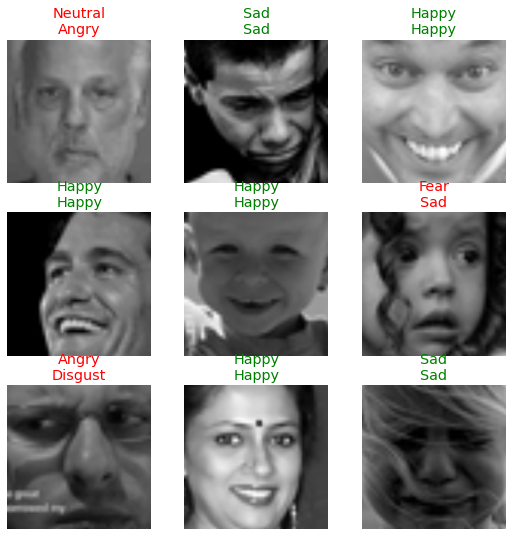

In [8]:
learn.show_results()

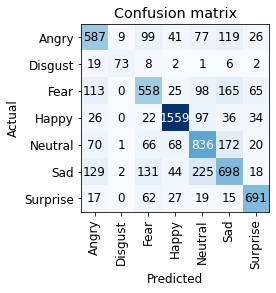

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

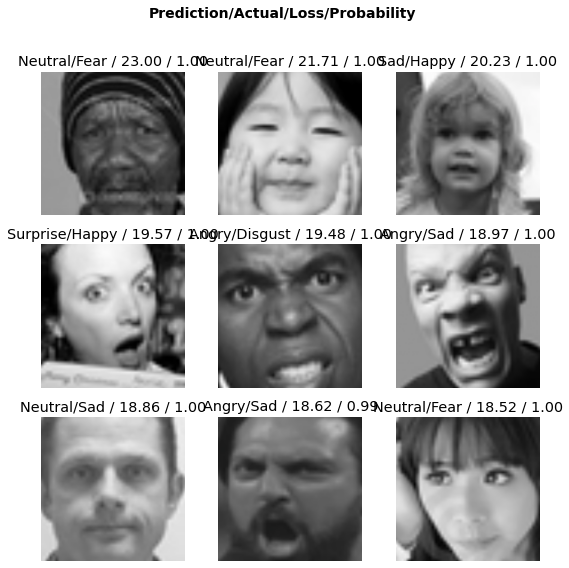

In [10]:
interp.plot_top_losses(k=9)

From the results, we can see that most of the top errors are resulted from bad labeling, and there are images that are hard to distinguish even for human eyes.

### Another Experiment - Colorization using DeepAI
Additionally, we experimented with adding color to our originally grayscale images to see if our model performed better. We did this using [Deep AI's Colorize Model](https://deepai.org/machine-learning-model/colorizer). (Code [here](https://github.com/peterpeng07/CS344FinalProject/blob/main/ImageColorization.ipynb)). Training the model only resulted in an accuracy of 0.640568. When we inspected the colorized images, we found that there was not much different in color, nor were they true to real world color of human faces, which is probably why it did not train well. (Code [here](https://github.com/peterpeng07/CS344FinalProject/blob/main/ColoredModel.ipynb))

## Additional Testing
Just to see how our model performs on our own faces, we decided to take a picture of our own faces with various expressions to see how the model would perform. Overall, the model performed quite well with some errors.

### Tests with our own photos

In [11]:
learn.save('final')
learn.export(fname='FinalModel.pkl')

In [5]:
mod = load_learner('/home/cp47/CS344FinalProject/FinalModel.pkl')

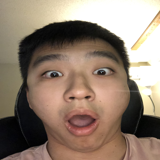

In [6]:
test1 = Image.open('test/test1.jpg').resize((160,160)).rotate(-90)
test1

In [7]:
mod.predict(numpy.array(test1))

('Surprise',
 TensorBase(6),
 TensorBase([1.0758e-06, 3.5298e-08, 2.2534e-01, 3.0611e-03, 4.1751e-04, 7.5513e-02, 6.9566e-01]))

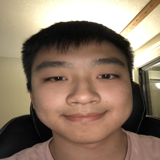

In [8]:
test2 = Image.open('test/test2.jpg').resize((160,160)).rotate(-90)
test2

In [9]:
mod.predict(numpy.array(test2))

('Happy',
 TensorBase(3),
 TensorBase([1.3568e-06, 3.0624e-07, 1.5960e-03, 9.6894e-01, 1.6995e-03, 1.6086e-02, 1.1677e-02]))

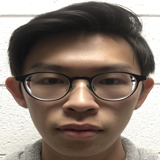

In [10]:
test3 = Image.open('test/test3.jpg').resize((160,160))
test3

In [11]:
mod.predict(numpy.array(test3))

('Neutral',
 TensorBase(4),
 TensorBase([4.6171e-02, 2.3268e-06, 2.0386e-04, 1.3104e-01, 8.0103e-01, 2.1548e-02, 3.0099e-06]))

## Summary
Overall, we found that our best model (70.24% accuracy) that came pretty close to the state-of-the-art model (73.28% accuracy) was the VGG16 architecture, using Cross Entropy Loss, trained on 20 epochs with a learning rate of 0.002. Unsurprisingly, this was the same architecture used for the state-of-the-art model, although they used a more advanced learning rate scheduler.

We believe that while we did not reach state-of-the-art, we achieved our goal of transfer learning and successfully implemented a close model through fast.ai's library. In the future, we would like to continue experimenting with more sophisticated optimizer algorithms using learning rate schedulers.
